# Neighborhood Data EDA

After pulling together data from the four locations we're looking at on demographics, commerce, crime, etc., I want to look at some EDA on it.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ACS demographic data

In [72]:
#import Pittsburgh educational attainment data
pitt_ed = pd.read_csv('Resources/ACS_data/merged_files/Pittsburgh/pittsburgh_ed_attainment.csv')

#import Philadelphia Race data 
philly_race = pd.read_csv('Resources/ACS_data/merged_files/Philadelphia/philly_race.csv')

#import Detroit income data
detroit_income = pd.read_csv('Resources/ACS_data/merged_files/Detroit/detroit_income.csv')

#import Connecticut employment data
ct_employment = pd.read_csv('Resources/ACS_data/merged_files/Connecticut/ct_employment.csv')

In [23]:
pitt_ed.columns = pitt_ed.iloc[0]
pitt_ed = pitt_ed.iloc[1:]
pitt_ed.head()

,0,Geography,Geographic Area Name,Total!!Estimate!!Population 18 to 24 years,Male!!Estimate!!Population 18 to 24 years,Female!!Estimate!!Population 18 to 24 years,Total!!Estimate!!Less than high school graduate,Male!!Estimate!!Less than high school graduate,Female!!Estimate!!Less than high school graduate,Total!!Estimate!!High school graduate (includes equivalency),Male!!Estimate!!High school graduate (includes equivalency),Female!!Estimate!!High school graduate (includes equivalency),Total!!Estimate!!Some college or associate's degree,Male!!Estimate!!Some college or associate's degree,Female!!Estimate!!Some college or associate's degree,Total!!Estimate!!Bachelor's degree or higher,Male!!Estimate!!Bachelor's degree or higher,Female!!Estimate!!Bachelor's degree or higher
1,1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",3673,1401,2272,0.0,0.0,0.0,14.9,13.7,15.7,84.7,86.2,83.7,0.4,0.1,0.6
2,2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",1477,1106,371,20.2,25.3,5.1,33.8,35.4,29.1,38.7,36.0,46.6,7.3,3.3,19.1
3,3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",29,19,10,0.0,0.0,0.0,34.5,52.6,0.0,0.0,0.0,0.0,65.5,47.4,100.0
4,4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",415,207,208,0.0,0.0,0.0,31.3,28.0,34.6,63.1,67.6,58.7,5.5,4.3,6.7
5,5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",1118,574,544,1.1,2.1,0.0,15.3,17.8,12.7,76.1,70.4,82.2,7.5,9.8,5.1


In [31]:
# convert values to floats
def convert_to_float(df):
    """
    Converts all columns in a DataFrame from string to float.
    If a value cannot be converted, it is replaced with 0.
    """
    def safe_convert(val):
        try:
            return float(val)
        except ValueError:
            return 0  # Replace invalid values with 0
    
    return df.applymap(safe_convert)

pitt_labels = pitt_ed[['Geography', 'Geographic Area Name']]
pitt_numeric = pitt_ed.drop(['Geography', 'Geographic Area Name'], axis=1)
new_pitt_num = convert_to_float(pitt_numeric)

new_pitt_num['Geography'] = pitt_labels['Geography']
new_pitt_num['Geographic Area Name'] = pitt_labels['Geographic Area Name']

new_pitt_num.head()


/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_81389/1957366348.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(safe_convert)


,0,Total!!Estimate!!Population 18 to 24 years,Male!!Estimate!!Population 18 to 24 years,Female!!Estimate!!Population 18 to 24 years,Total!!Estimate!!Less than high school graduate,Male!!Estimate!!Less than high school graduate,Female!!Estimate!!Less than high school graduate,Total!!Estimate!!High school graduate (includes equivalency),Male!!Estimate!!High school graduate (includes equivalency),Female!!Estimate!!High school graduate (includes equivalency),Total!!Estimate!!Some college or associate's degree,Male!!Estimate!!Some college or associate's degree,Female!!Estimate!!Some college or associate's degree,Total!!Estimate!!Bachelor's degree or higher,Male!!Estimate!!Bachelor's degree or higher,Female!!Estimate!!Bachelor's degree or higher,Geography,Geographic Area Name
1,1.0,3673.0,1401.0,2272.0,0.0,0.0,0.0,14.9,13.7,15.7,84.7,86.2,83.7,0.4,0.1,0.6,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania"
2,2.0,1477.0,1106.0,371.0,20.2,25.3,5.1,33.8,35.4,29.1,38.7,36.0,46.6,7.3,3.3,19.1,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania"
3,3.0,29.0,19.0,10.0,0.0,0.0,0.0,34.5,52.6,0.0,0.0,0.0,0.0,65.5,47.4,100.0,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania"
4,4.0,415.0,207.0,208.0,0.0,0.0,0.0,31.3,28.0,34.6,63.1,67.6,58.7,5.5,4.3,6.7,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania"
5,5.0,1118.0,574.0,544.0,1.1,2.1,0.0,15.3,17.8,12.7,76.1,70.4,82.2,7.5,9.8,5.1,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania"


In [34]:
#How many 18-24 y/os in the data set
new_pitt_num['Total!!Estimate!!Population 18 to 24 years'].sum()

1602754.0

In [38]:
#Avg. percent college-educated by tract
print("Avg. less than high school:")
print(new_pitt_num['Total!!Estimate!!Less than high school graduate'].mean())

print("Avg. some college:")
print(new_pitt_num['Total!!Estimate!!Some college or associate\'s degree'].mean())

print("Avg. bachelor's or higher:")
print(new_pitt_num['Total!!Estimate!!Bachelor\'s degree or higher'].mean())

Avg. less than high school:
20.101372793724373
Avg. some college:
88.19871634872526
Avg. bachelor's or higher:
42.776947762524514


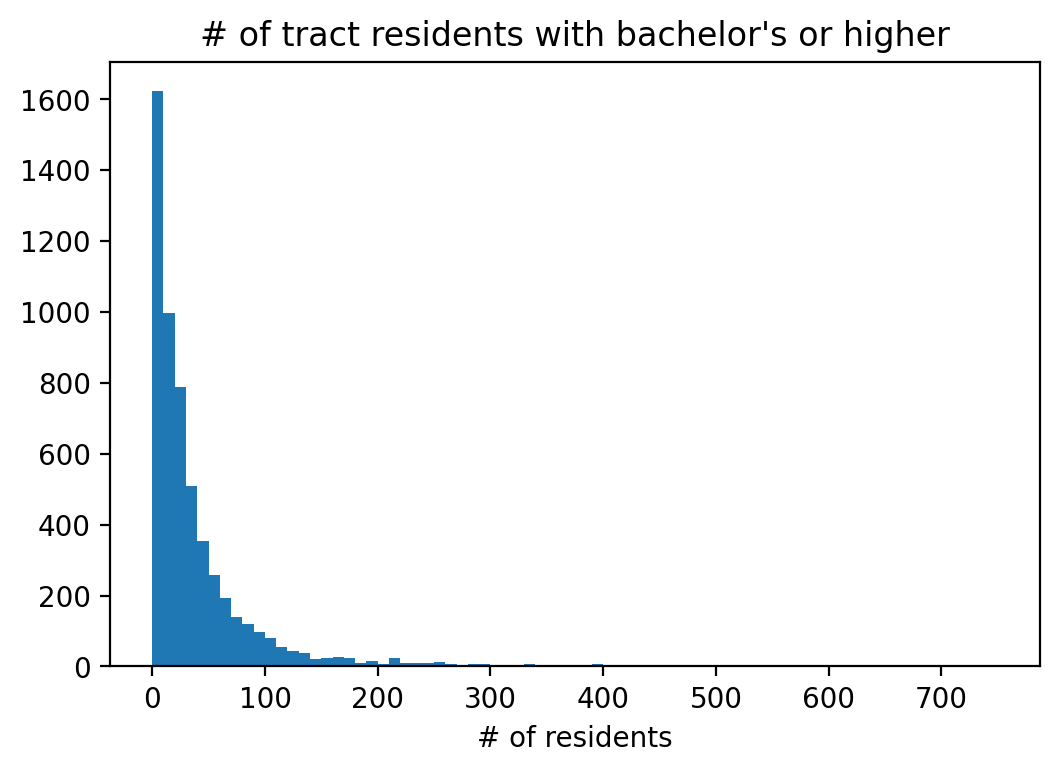

In [44]:
#distribution of bachelor's or higher by tract
plt.figure(figsize=(6,4), dpi=200)

plt.hist(new_pitt_num['Total!!Estimate!!Bachelor\'s degree or higher'], bins=np.arange(0,760, 10))
plt.title("# of tract residents with bachelor's or higher")
plt.xlabel('# of residents')
plt.show()

In [47]:
#do more women or men have bachelor's degrees on average?
print('Avg. (female): ' + str(new_pitt_num['Female!!Estimate!!Bachelor\'s degree or higher'].mean()))
print('Avg. (male): ' + str(new_pitt_num['Male!!Estimate!!Bachelor\'s degree or higher'].mean()))

Avg. (female): 23.980584774469605
Avg. (male): 18.963237653770726


### Race in Philadelphia

In [50]:
philly_race.columns = philly_race.iloc[0]
philly_race = philly_race.iloc[1:]
philly_race.head()

,0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!White alone,Estimate!!Total!!Black or African American alone,Estimate!!Total!!American Indian and Alaska Native alone,Estimate!!Total!!Asian alone,Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Some other race alone,Estimate!!Total!!Two or more races,Estimate!!Total!!Two or more races!!Two races including Some other race,"Estimate!!Total!!Two or more races!!Two races excluding Some other race, and three or more races"
1,1,1400000US42101000100,"Census Tract 1, Philadelphia County, Pennsylvania",3042,2660,200,0,121,0,45,16,0,16
2,2,1400000US42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",1919,358,30,0,1519,0,0,12,0,12
3,3,1400000US42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",4333,2968,491,0,723,0,13,138,23,115
4,4,1400000US42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",1525,876,99,14,395,0,0,141,19,122
5,5,1400000US42101000402,"Census Tract 4.02, Philadelphia County, Pennsy...",3156,2762,134,0,137,0,28,95,0,95


In [54]:
philly_race.columns

Index([                                                                                                 0,
                                                                                              'Geography',
                                                                                   'Geographic Area Name',
                                                                                        'Estimate!!Total',
                                                                           'Estimate!!Total!!White alone',
                                                       'Estimate!!Total!!Black or African American alone',
                                               'Estimate!!Total!!American Indian and Alaska Native alone',
                                                                           'Estimate!!Total!!Asian alone',
                                      'Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone',
                                     

In [56]:
#overall demographics
phil_labels = philly_race[['Geography', 'Geographic Area Name']]
phil_numeric = philly_race.drop(['Geography', 'Geographic Area Name'], axis=1)
new_phil_num = convert_to_float(phil_numeric)

new_phil_num['Geography'] = phil_labels['Geography']
new_phil_num['Geographic Area Name'] = phil_labels['Geographic Area Name']

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_81389/1957366348.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(safe_convert)


In [61]:
pop_sums = new_phil_num.drop(['Geography', 'Geographic Area Name'], axis=1).sum()
pop_sums.sort_values()

0
Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone                                      14060.0
Estimate!!Total!!American Indian and Alaska Native alone                                               72948.0
Estimate!!Total!!Two or more races!!Two races including Some other race                               225939.0
Estimate!!Total!!Two or more races!!Two races excluding Some other race, and three or more races      548448.0
Estimate!!Total!!Two or more races                                                                    774387.0
Estimate!!Total!!Some other race alone                                                               1415729.0
Estimate!!Total!!Asian alone                                                                         1520677.0
Estimate!!Total!!White alone                                                                         8798352.0
Estimate!!Total!!Black or African American alone                                                     9225988.0

In [62]:
#percent black by tract
new_phil_num['perc_black'] = new_phil_num['Estimate!!Total!!Black or African American alone']/new_phil_num['Estimate!!Total']
new_phil_num['perc_black'].describe()

count    5330.000000
mean        0.426881
std         0.348977
min         0.000000
25%         0.097974
50%         0.320088
75%         0.806155
max         1.000000
Name: perc_black, dtype: float64

In [63]:
#tracts that are 100% black
new_phil_num[new_phil_num['perc_black'] == 1]

,0,Estimate!!Total,Estimate!!Total!!White alone,Estimate!!Total!!Black or African American alone,Estimate!!Total!!American Indian and Alaska Native alone,Estimate!!Total!!Asian alone,Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Some other race alone,Estimate!!Total!!Two or more races,Estimate!!Total!!Two or more races!!Two races including Some other race,"Estimate!!Total!!Two or more races!!Two races excluding Some other race, and three or more races",Geography,Geographic Area Name,perc_black
168,168.0,3741.0,0.0,3741.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101017202,"Census Tract 172.02, Philadelphia County, Penn...",1.0
883,883.0,2868.0,0.0,2868.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101011300,"Census Tract 113, Philadelphia County, Pennsyl...",1.0
5034,5034.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101036901,Census Tract 369.01; Philadelphia County; Penn...,1.0
5443,5443.0,49.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101036901,Census Tract 369.01; Philadelphia County; Penn...,1.0


In [64]:
#tracts that are the most asian
new_phil_num['perc_asian'] = new_phil_num['Estimate!!Total!!Asian alone']/new_phil_num['Estimate!!Total']
new_phil_num.sort_values(by='perc_asian', ascending=False)

,0,Estimate!!Total,Estimate!!Total!!White alone,Estimate!!Total!!Black or African American alone,Estimate!!Total!!American Indian and Alaska Native alone,Estimate!!Total!!Asian alone,Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Some other race alone,Estimate!!Total!!Two or more races,Estimate!!Total!!Two or more races!!Two races including Some other race,"Estimate!!Total!!Two or more races!!Two races excluding Some other race, and three or more races",Geography,Geographic Area Name,perc_black,perc_asian
2,2.0,1919.0,358.0,30.0,0.0,1519.0,0.0,0.0,12.0,0.0,12.0,1400000US42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",0.015633,0.791558
387,387.0,1897.0,406.0,23.0,0.0,1443.0,0.0,16.0,9.0,0.0,9.0,1400000US42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",0.012124,0.760675
3467,3467.0,2860.0,656.0,123.0,8.0,1865.0,0.0,59.0,149.0,35.0,114.0,1400000US42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",0.043007,0.652098
1157,1157.0,2215.0,673.0,83.0,0.0,1420.0,0.0,18.0,21.0,9.0,12.0,1400000US42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",0.037472,0.641084
772,772.0,2009.0,706.0,44.0,0.0,1231.0,0.0,19.0,9.0,9.0,0.0,1400000US42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",0.021901,0.612743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101980903,Census Tract 9809.03; Philadelphia County; Pen...,NaN,NaN
5480,5480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101980904,Census Tract 9809.04; Philadelphia County; Pen...,NaN,NaN
5481,5481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101980905,Census Tract 9809.05; Philadelphia County; Pen...,NaN,NaN
5482,5482.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400000US42101980906,Census Tract 9809.06; Philadelphia County; Pen...,NaN,NaN


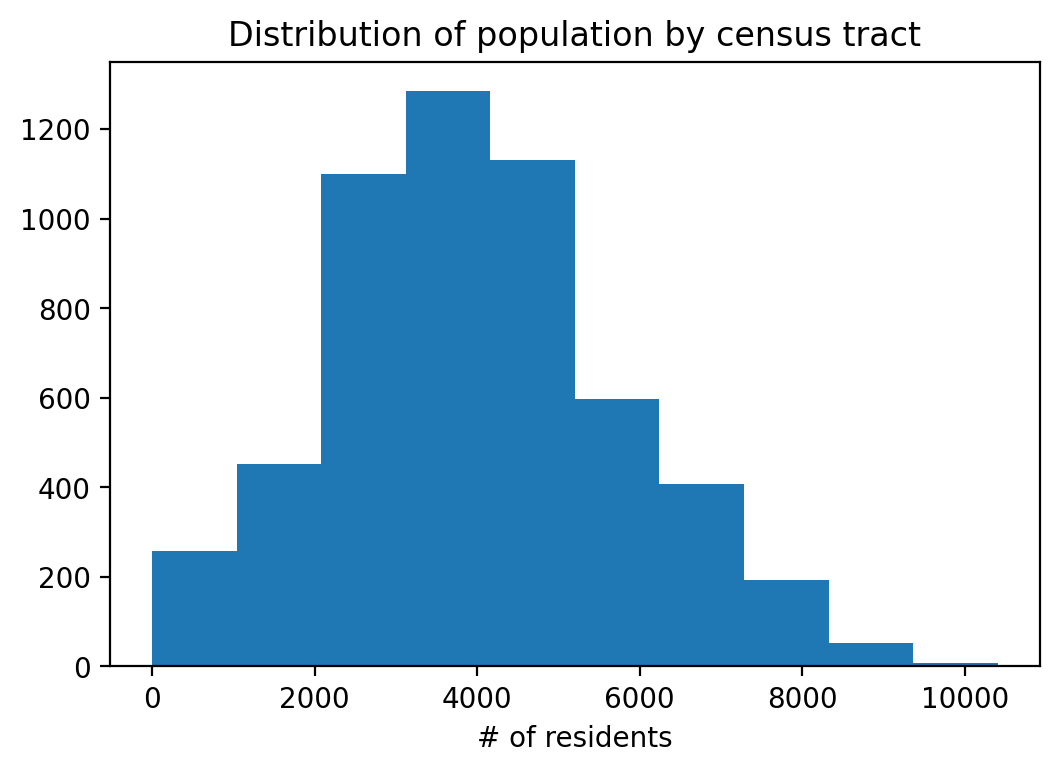

In [67]:
#distribution of total pop. by tract
plt.figure(figsize=(6,4), dpi=200)
plt.hist(new_phil_num['Estimate!!Total'])
plt.title('Distribution of population by census tract')
plt.xlabel('# of residents')
plt.show()

### Income in Detroit

In [73]:
#overall demographics
detroit_income.columns = detroit_income.iloc[0]
detroit_income = detroit_income.iloc[1:]

detroit_labels = detroit_income[['Geography', 'Geographic Area Name']]
detroit_numeric = detroit_income.drop(['Geography', 'Geographic Area Name'], axis=1)
new_detr_num = convert_to_float(detroit_numeric)

new_detr_num['Geography'] = detroit_labels['Geography']
new_detr_num['Geographic Area Name'] = detroit_labels['Geographic Area Name']

new_detr_num.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_81389/1957366348.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(safe_convert)


,0,Households!!Estimate!!Total,Families!!Estimate!!Total,Married-couple families!!Estimate!!Total,"Households!!Estimate!!$200,000 or more","Families!!Estimate!!$200,000 or more","Married-couple families!!Estimate!!$200,000 or more","Nonfamily households!!Estimate!!$200,000 or more",Households!!Estimate!!Median income (dollars),Families!!Estimate!!Median income (dollars),Married-couple families!!Estimate!!Median income (dollars),Nonfamily households!!Estimate!!Median income (dollars),Households!!Estimate!!Mean income (dollars),Families!!Estimate!!Mean income (dollars),Married-couple families!!Estimate!!Mean income (dollars),Nonfamily households!!Estimate!!Mean income (dollars),Geography,Geographic Area Name
1,1.0,1293.0,838.0,386.0,0.0,0.0,0.0,0.0,40477.0,41304.0,60202.0,37781.0,43164.0,46652.0,0,34102.0,1400000US26163500100,"Census Tract 5001, Wayne County, Michigan"
2,2.0,1072.0,676.0,267.0,0.0,0.0,0.0,0.0,36396.0,36778.0,71513.0,35859.0,44162.0,46125.0,0,40789.0,1400000US26163500200,"Census Tract 5002, Wayne County, Michigan"
3,3.0,919.0,735.0,164.0,0.0,0.0,0.0,0.0,22146.0,25417.0,48750.0,17593.0,28817.0,29860.0,0,21217.0,1400000US26163500300,"Census Tract 5003, Wayne County, Michigan"
4,4.0,562.0,308.0,67.0,0.0,0.0,0.0,0.0,22179.0,25250.0,56948.0,20875.0,27692.0,33352.0,0,18948.0,1400000US26163500400,"Census Tract 5004, Wayne County, Michigan"
5,5.0,762.0,565.0,104.0,2.8,3.7,20.2,0.0,31071.0,32321.0,56875.0,9418.0,48235.0,56581.0,0,17210.0,1400000US26163500500,"Census Tract 5005, Wayne County, Michigan"


In [77]:
#top 5 richest tracts
sorted_tracts = new_detr_num.sort_values(by='Households!!Estimate!!Median income (dollars)', ascending=False)[
    ['Geographic Area Name',
     'Households!!Estimate!!Median income (dollars)']
]

top_5 = sorted_tracts[:5]
bottom_5 = sorted_tracts[len(sorted_tracts)-5:]

In [78]:
top_5

,Geographic Area Name,Households!!Estimate!!Median income (dollars)
8350,Census Tract 5613.02; Wayne County; Michigan,247619.0
7722,Census Tract 5613.02; Wayne County; Michigan,238140.0
6466,"Census Tract 5613.02, Wayne County, Michigan",231900.0
7094,"Census Tract 5613.02, Wayne County, Michigan",223906.0
7646,Census Tract 5506; Wayne County; Michigan,216250.0


In [79]:
bottom_5

,Geographic Area Name,Households!!Estimate!!Median income (dollars)
3060,Geographic Area Name,0.0
7668,Census Tract 5538; Wayne County; Michigan,0.0
7666,Census Tract 5532; Wayne County; Michigan,0.0
7664,Census Tract 5530; Wayne County; Michigan,0.0
8631,Census Tract 9902; Wayne County; Michigan,0.0


In [81]:
#tracts with $0 median income
zero_tracts = new_detr_num[new_detr_num['Households!!Estimate!!Median income (dollars)'] == 0]
len(zero_tracts)

343

### Employment in CT

In [82]:
ct_employment.columns = ct_employment.iloc[0]
ct_employment = ct_employment.iloc[1:]

ct_labels = ct_employment[['Geography', 'Geographic Area Name']]
ct_numeric = ct_employment.drop(['Geography', 'Geographic Area Name'], axis=1)
new_ct_num = convert_to_float(ct_numeric)

new_ct_num['Geography'] = ct_labels['Geography']
new_ct_num['Geographic Area Name'] = ct_labels['Geographic Area Name']

new_ct_num.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_81389/1957366348.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(safe_convert)


,0,Total!!Estimate!!Population 16 years and over,In labor force!!Estimate!!Population 16 years and over,Employed!!Estimate!!Population 16 years and over,Unemployment rate!!Estimate!!Population 16 years and over,Total!!Estimate!!AGE!!16 to 19 years,In labor force!!Estimate!!AGE!!16 to 19 years,Employed!!Estimate!!AGE!!16 to 19 years,Unemployment rate!!Estimate!!AGE!!16 to 19 years,Total!!Estimate!!AGE!!20 to 24 years,...,Total!!Estimate!!AGE!!65 to 74 years,In labor force!!Estimate!!AGE!!65 to 74 years,Employed!!Estimate!!AGE!!65 to 74 years,Unemployment rate!!Estimate!!AGE!!65 to 74 years,Total!!Estimate!!AGE!!75 years and over,In labor force!!Estimate!!AGE!!75 years and over,Employed!!Estimate!!AGE!!75 years and over,Unemployment rate!!Estimate!!AGE!!75 years and over,Geography,Geographic Area Name
1,1.0,3069.0,54.7,52.8,3.5,209.0,39.2,33.0,15.9,82.0,...,378.0,27.5,27.5,0.0,581.0,10.8,9.6,11.1,1400000US09001010101,"Census Tract 101.01, Fairfield County, Connect..."
2,2.0,3557.0,55.6,53.1,4.4,226.0,4.4,4.4,0.0,172.0,...,413.0,37.3,35.4,5.2,337.0,6.8,6.8,0.0,1400000US09001010102,"Census Tract 101.02, Fairfield County, Connect..."
3,3.0,2411.0,45.9,43.7,4.8,232.0,27.6,9.1,67.2,62.0,...,305.0,39.3,39.3,0.0,367.0,9.8,9.8,0.0,1400000US09001010201,"Census Tract 102.01, Fairfield County, Connect..."
4,4.0,3742.0,60.5,57.9,4.4,251.0,8.8,8.8,0.0,117.0,...,383.0,27.4,25.1,8.6,310.0,14.2,10.6,25.0,1400000US09001010202,"Census Tract 102.02, Fairfield County, Connect..."
5,5.0,3044.0,53.6,50.1,6.5,241.0,8.3,8.3,0.0,41.0,...,377.0,34.0,34.0,0.0,355.0,11.3,11.3,0.0,1400000US09001010300,"Census Tract 103, Fairfield County, Connecticut"


In [84]:
#total labor force participation
new_ct_num['Employed!!Estimate!!Population 16 years and over'].sum()/new_ct_num['Total!!Estimate!!Population 16 years and over'].sum()

0.01876987709964602

In [85]:
#avg labor force participation
new_ct_num['Employed!!Estimate!!Population 16 years and over'].mean()

55.27555989265675

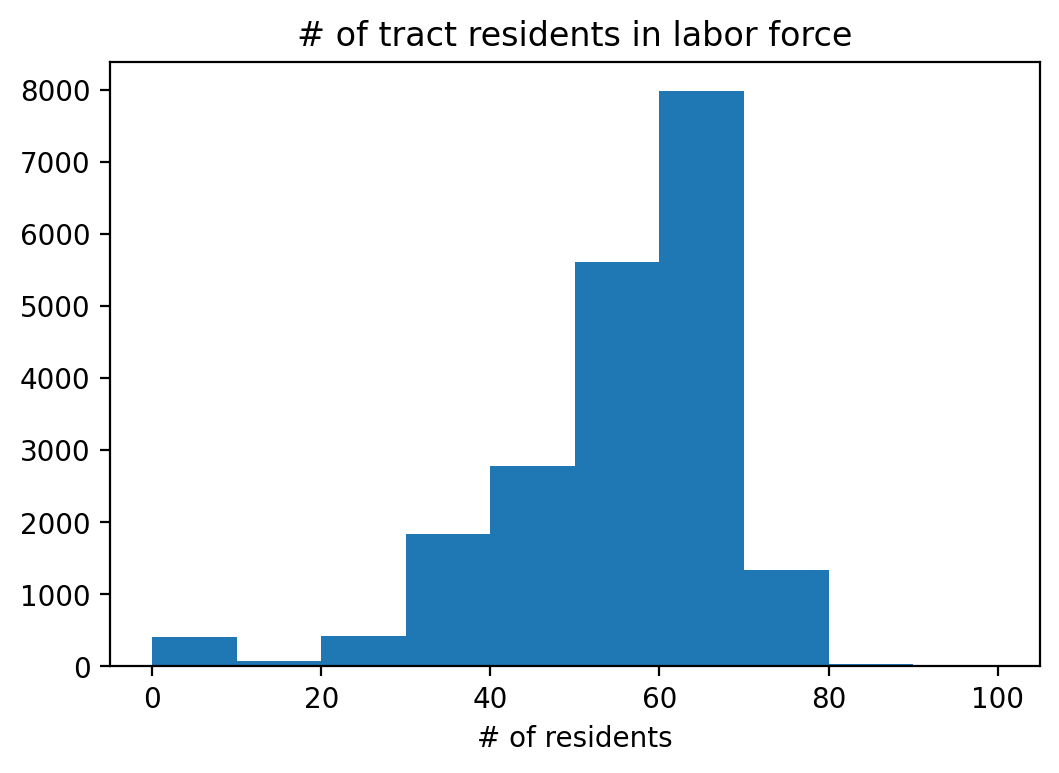

In [86]:
#distrbution by labor force participation
plt.figure(figsize=(6,4), dpi=200)

plt.hist(new_ct_num['Employed!!Estimate!!Population 16 years and over'])
plt.title("# of tract residents in labor force")
plt.xlabel('# of residents')
plt.show()

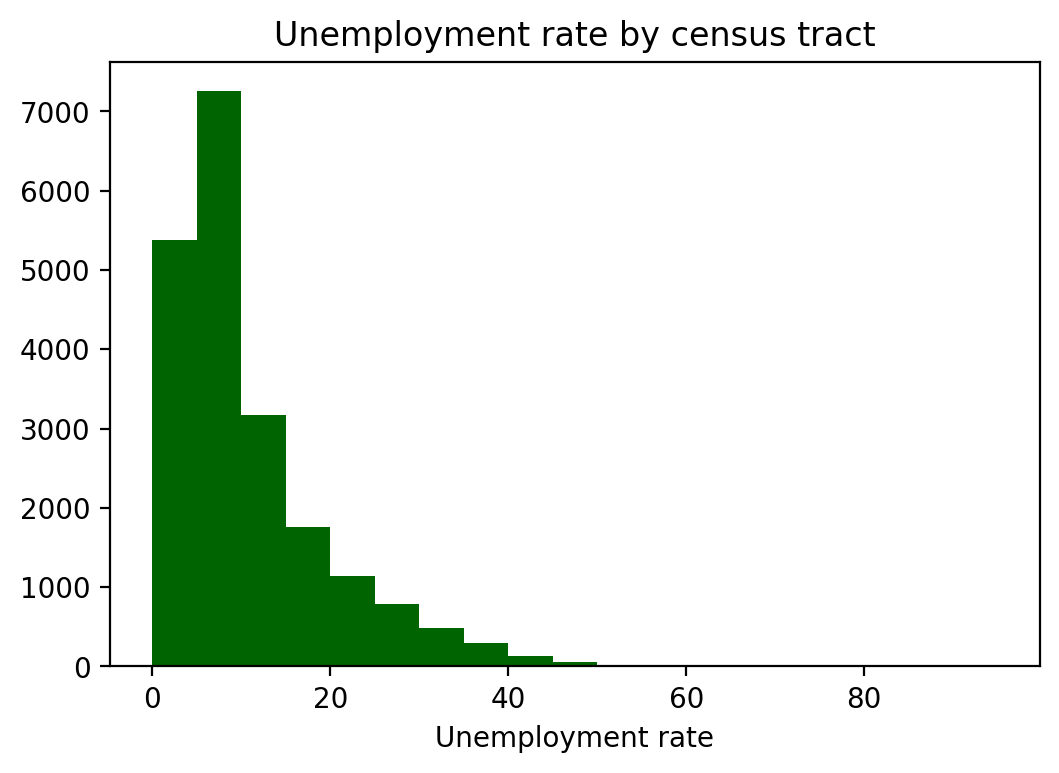

In [95]:
#employment rate distribution
plt.figure(figsize=(6,4), dpi=200)

plt.hist(new_ct_num['Unemployment rate!!Estimate!!Population 16 years and over'],
         bins = np.arange(0, 100, 5),
         color='darkgreen')
plt.title("Unemployment rate by census tract")
plt.xlabel('Unemployment rate')
plt.show()